In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset:

In [3]:
df=pd.read_csv("Mall_Customers.csv")

# understand the dataset:

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.shape

(200, 5)

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Exploratory Data Analysis (EDA):

In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 8.9 KB


In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gender Distribution:

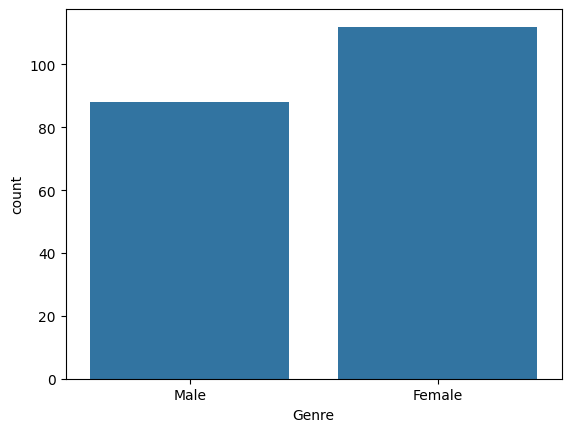

In [26]:
sns.countplot(x='Genre', data=df)
plt.show()


### Age Distribution:

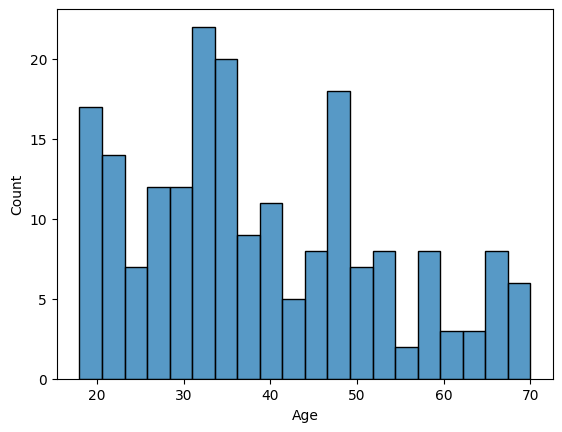

In [29]:
sns.histplot(df['Age'], bins=20)
plt.show()


### Income vs Spending Score:

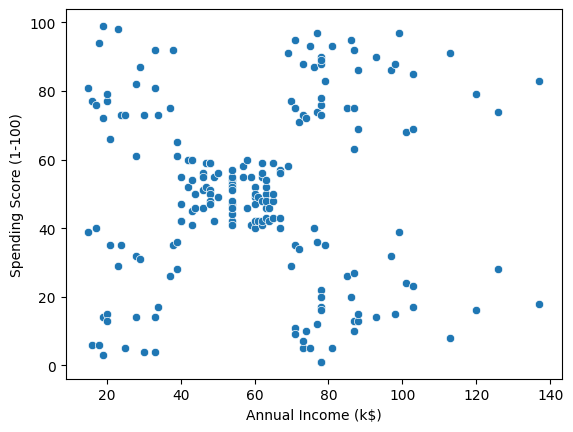

In [32]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()


# Data Preprocessing:

### Remove Unnecessary Column:

In [36]:
df = df.drop('CustomerID', axis=1)


### Convert Gender to Numeric:

In [41]:
df['Genre'] = df['Genre'].map({'Male':0, 'Female':1})


In [43]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Feature Scaling:

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Apply K-Means Clustering:

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
df.head()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,4
4,1,31,17,40,4


### Cluster Visualization Using PCA:

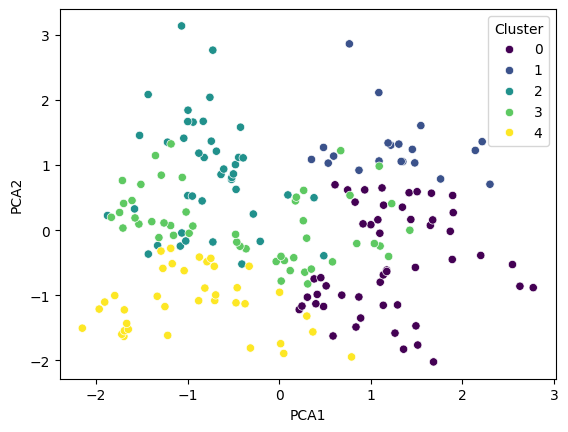

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.show()


### Cluster Analysis:

In [57]:
df.groupby('Cluster').mean()


,Genre,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
Cluster,,,,,,
0,0.490196,56.470588,46.098039,39.313725,1.196512,-0.509010
1,0.000000,39.500000,85.150000,14.050000,1.254732,1.275794
2,0.000000,28.690476,60.904762,70.238095,-0.771673,0.873183
3,1.000000,37.897959,82.122449,54.448980,-0.373001,0.098257
4,1.000000,27.315789,38.842105,56.210526,-0.932353,-1.080123
